In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
df = pd.read_csv('file:///C://Users/Lenovo/Desktop/Data/Fraud_check.csv')
df.head()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.shape

(600, 6)

In [4]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
def split(num):
    if num < 30000:
        return 'Risky'
    else:
        return 'Good'
    
df['Taxable.Income'] = df['Taxable.Income'].apply(split)

In [8]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


<AxesSubplot:>

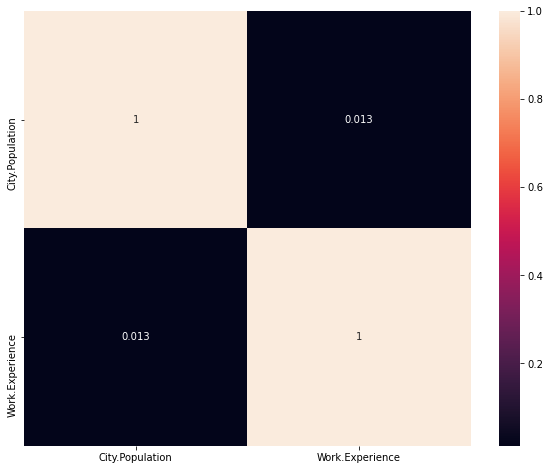

In [9]:
corr = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [12]:
df1 = df[['Undergrad','Marital.Status','Urban']].apply(le.fit_transform)
df1.head()

,Undergrad,Marital.Status,Urban
0,0,2,1
1,1,0,1
2,0,1,1
3,1,2,1
4,0,1,0


In [13]:
df = df.drop(columns={'Undergrad', 'Urban', 'Marital.Status'}, axis=1)

In [14]:
df =pd.concat([df, df1], axis=1, sort=False)
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,Good,50047,10,0,2,1
1,Good,134075,18,1,0,1
2,Good,160205,30,0,1,1
3,Good,193264,15,1,2,1
4,Good,27533,28,0,1,0


In [15]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, 1:6]
y = df.iloc[:, 0]

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

#  Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier(n_estimators=10, n_jobs=5, criterion='entropy')
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=5)

In [28]:
pred_train = rf.predict(x_train)

In [29]:
metrics.accuracy_score(pred_train,y_train)

0.9666666666666667

In [30]:
metrics.confusion_matrix(pred_train,y_train)

array([[381,  15],
       [  1,  83]], dtype=int64)

In [31]:
pred_test = rf.predict(x_test)

In [32]:
metrics.accuracy_score(pred_test,y_test)

0.7166666666666667

In [34]:
dff =pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
dff

,Actual,Predicted
550,Good,Risky
252,Good,Good
412,Good,Good
171,Risky,Good
345,Good,Good
...,...,...
365,Good,Good
433,Risky,Good
485,Good,Good
182,Risky,Good


In [37]:
cols = list(df.columns)

In [38]:
cols

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad',
 'Marital.Status',
 'Urban']

In [39]:
predictors = cols[1:6]
target = cols[0]

In [43]:
rf.feature_importances_

array([0.51091349, 0.37283709, 0.03318335, 0.05656586, 0.02650021])

In [45]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)

fi

,feature,importance
0,City.Population,0.510913
1,Work.Experience,0.372837
3,Marital.Status,0.056566
2,Undergrad,0.033183
4,Urban,0.026500
